In [1]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

In [2]:
import pandas as pd
import numpy as np

1. Explore Dataset

In [3]:
#Display first 10 rows
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#891 rows, 15 columns
titanic.shape

(891, 15)

2. Using .loc and .iloc

In [5]:
#select rows 5-15 and columns age and fare
titanic.loc[5:15][["age", "fare"]]

,age,fare
5,NaN,8.4583
6,54.0,51.8625
7,2.0,21.0750
8,27.0,11.1333
9,14.0,30.0708
10,4.0,16.7000
11,58.0,26.5500
12,20.0,8.0500
13,39.0,31.2750
14,14.0,7.8542


In [9]:
#Select first 5 rows and first 3 columns using .iloc
titanic.iloc[0:5,0:3]


,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [15]:
#Find age of passenger at 100th index using .iloc
titanic.iloc[100,3]
#Age is 28

28.0

3. Using groupby and aggregate functions

In [24]:
#group dataset by sex, find mean age
by_sex=titanic.groupby("sex")
by_sex["age"].mean(numeric_only=True)

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [25]:
#Group dataset by class, and find max and min age in each class
by_class=titanic.groupby("pclass")
by_class["age"].aggregate(["min", "max"])

,min,max
pclass,,
1,0.92,80.0
2,0.67,70.0
3,0.42,74.0


In [38]:
#group dataset by sex and class, find total number of passengers and average fare for each group
sex_class=titanic.groupby(["sex","pclass"])
sex_class["fare"].aggregate(["count", "mean"])


count        mean
sex    pclass                   
female 1          94  106.125798
       2          76   21.970121
       3         144   16.118810
male   1         122   67.226127
       2         108   19.741782
       3         347   12.661633

4. Using pivot table

In [40]:
#Create a pivot table that shows median age of passengers
# For each combination of sex and class
pass_sex_class=titanic.pivot_table("age", index="pclass", columns="sex", aggfunc="median")
pass_sex_class

sex,female,male
pclass,,
1,35.0,40.0
2,28.0,30.0
3,21.5,25.0


In [41]:
# create pivot table that shows total fare collected for each combination of 
# embark town and deck
fare_town_deck=titanic.pivot_table("fare", index="embark_town", columns="deck", aggfunc="sum")
fare_town_deck

deck,A,B,C,D,E,F,G
embark_town,,,,,,,
Cherbourg,268.5042,3211.2084,2070.2332,968.1127,464.5292,22.3583,0.000
Queenstown,0.0000,0.0000,180.0000,0.0000,12.3500,7.7500,0.000
Southampton,325.8541,1963.5625,3658.6959,920.9583,995.9750,212.9500,54.325


<Axes: xlabel='sex', ylabel='pclass'>

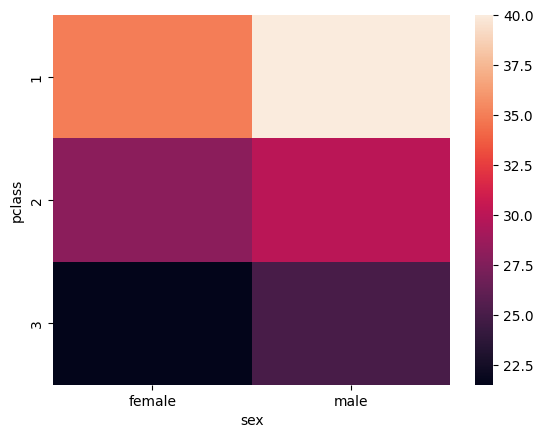

In [42]:
#Plot a heatmap using seaborn to visualize results of any above
# Pivot tables
sns.heatmap(data=pass_sex_class)